<a href="https://colab.research.google.com/github/ZhaoningYu/Detecting-dog-in-image/blob/master/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers.normalization import BatchNormalization

print("Loaded all libraries")

Loaded all libraries


Using TensorFlow backend.


In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
path = "/content/drive/My Drive/Digital Image processing/Final Project/Datasets/images/Images/"
random_seed = 42

categories = os.listdir(path)
categories = categories[:20]
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['n02087046-toy_terrier', 'n02086240-Shih-Tzu', 'n02085782-Japanese_spaniel', 'n02086910-papillon', 'n02086079-Pekinese', 'n02085936-Maltese_dog', 'n02086646-Blenheim_spaniel', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02085620-Chihuahua', 'n02088238-basset', 'n02088466-bloodhound', 'n02089078-black-and-tan_coonhound', 'n02088364-beagle', 'n02090721-Irish_wolfhound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02089867-Walker_hound', 'n02088632-bluetick', 'n02090622-borzoi'] 

No. of categories =  20


In [4]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(path+"/"+category):
            img = cv2.imread(path+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            img_array = Image.fromarray(img, 'RGB')
            
            #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
            resized_img = img_array.resize((227, 227))
            
            img_lst.append(np.array(resized_img))
            
            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  3633 
No. of labels loaded =  3633
<class 'list'> <class 'list'>


In [5]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))


Images shape =  (3633, 227, 227, 3) 
Labels shape =  (3633,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


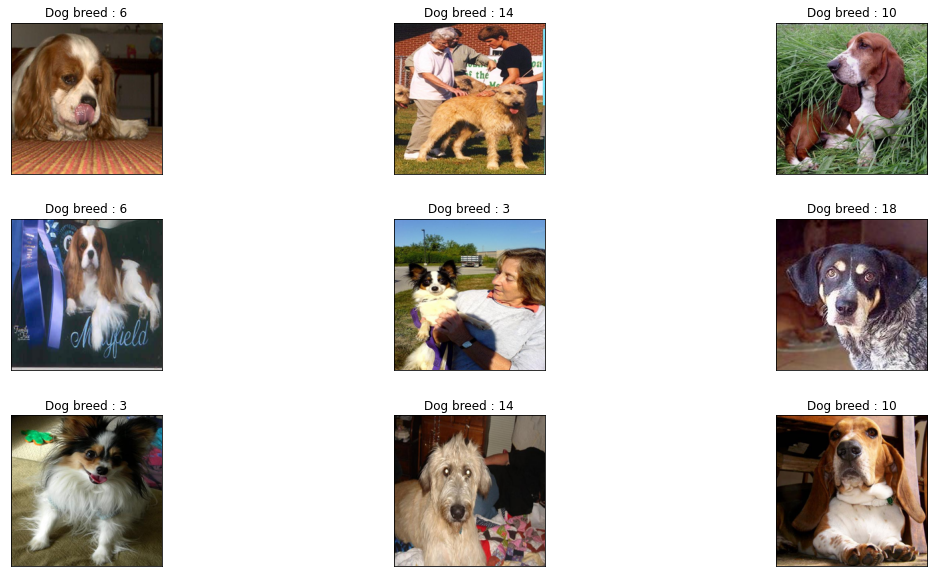

In [6]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Dog breed : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

In [7]:
#1-step in data shuffling

#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [   0    1    2 ... 3630 3631 3632]

'n' values after shuffling =  [2178  183  184 ...  860 3507 3174]


In [8]:
#2-step in data shuffling

#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (3633, 227, 227, 3) 
Labels shape after shuffling =  (3633,)


In [9]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (3633, 227, 227, 3)


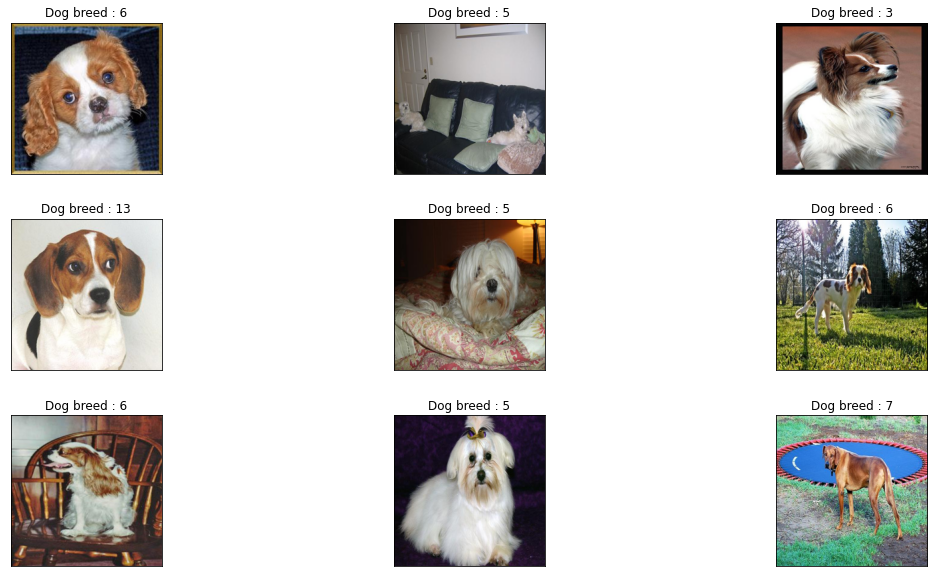

In [10]:
display_rand_images(images, labels)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (2906, 227, 227, 3)
y_train shape =  (2906,)

x_test shape =  (727, 227, 227, 3)
y_test shape =  (727,)


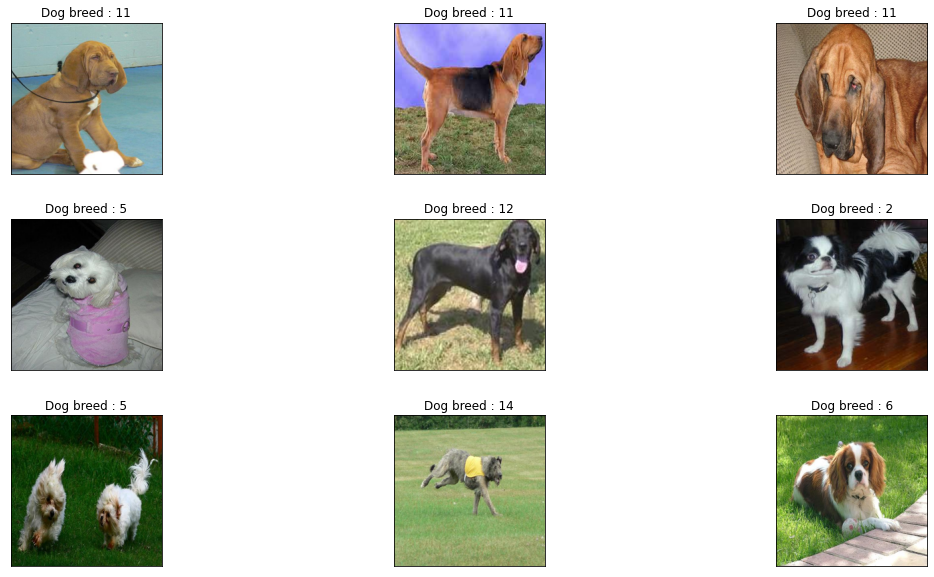

In [12]:
display_rand_images(x_train, y_train)

In [13]:
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#output layer
model.add(Dense(20,activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 256)       1024      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 384)        

In [0]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [15]:
%%time
model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
2906/2906 [==============================] - 10s 4ms/step - loss: 3.5280 - accuracy: 0.0964
Epoch 2/1000
2906/2906 [==============================] - 3s 1ms/step - loss: 3.1839 - accuracy: 0.1153
Epoch 3/1000
2906/2906 [==============================] - 3s 1ms/step - loss: 3.0867 - accuracy: 0.1280
Epoch 4/1000
2906/2906 [==============================] - 3s 1ms/step - loss: 2.9568 - accuracy: 0.1456
Epoch 5/1000
2906/2906 [==============================] - 3s 1ms/step - loss: 2.8790 - accuracy: 0.1655
Epoch 6/1000
2906/2906 [==============================] - 3s 1ms/step - loss: 2.8103 - accuracy: 0.1800
Epoch 7/1000
2906/2906 [==============================] - 3s 1ms/step - loss: 2.7156 - accuracy: 0.2017
Epoch 8/1000
2906/2906 [==============================] - 3s 1ms/step - loss: 2.6227 - accuracy: 0.2223
Epoch 9/1000
2906/2906 [==============================] - 3s 1ms/step - loss: 2.5735 - accuracy: 0.2216
Epoch 10/1000
2906/2906 [==============================] - 3s 1

In [16]:
loss, accuracy = model.evaluate(x_test, y_test)

print(loss,accuracy)

727/727 [==============================] - 1s 798us/step
6.36548970522874 0.30811554193496704


In [17]:
pred = model.predict(x_test)

pred.shape

(727, 20)

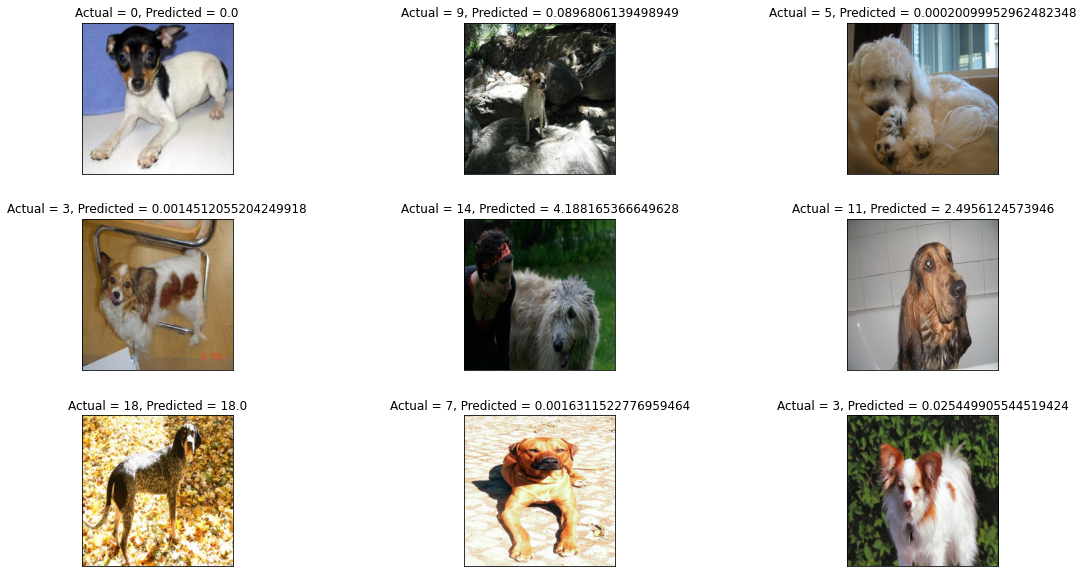

In [18]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, x_test.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()